In [1]:
import pandas as pd
df = pd.read_csv('Data/Stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
print("Raw Counts:")
print(df['stroke'].value_counts())
print()
print('Percentages:')
print(df['stroke'].value_counts(normalize=True))

Raw Counts:
0    4861
1     249
Name: stroke, dtype: int64

Percentages:
0    0.951272
1    0.048728
Name: stroke, dtype: float64


<AxesSubplot:xlabel='stroke', ylabel='count'>

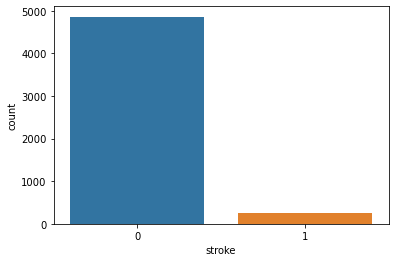

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.countplot(df['stroke'])

In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df['bmi'] = df['bmi'].fillna(df.bmi.mean())
df['bmi'] = df['bmi'].round(decimals=1)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.groupby('stroke').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36487.236371,41.971545,0.088871,0.047110,104.795513,28.825612
1,37115.068273,67.728193,0.265060,0.188755,132.544739,30.218876


In [8]:
"""The mean age of people with stroke is around 67 years, they more likely to have hypertension and heart disease, their average glucose level and bmi is higher"""

'The mean age of people with stroke is around 67 years, they more likely to have hypertension and heart disease, their average glucose level and bmi is higher'

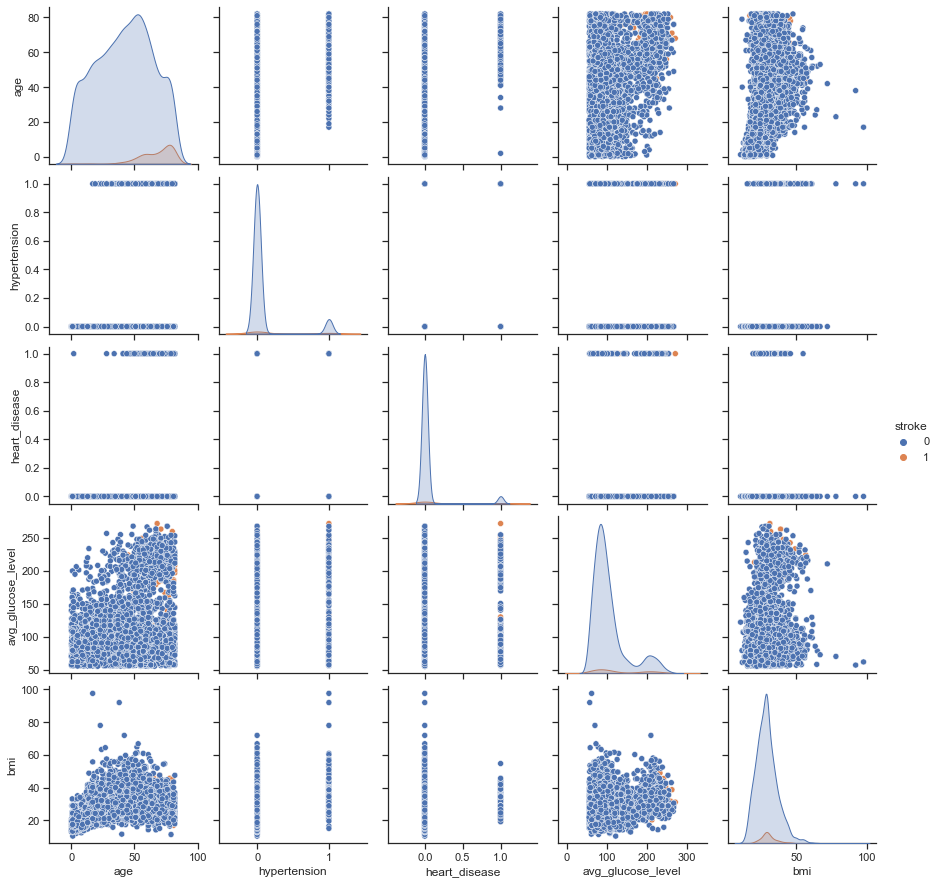

In [9]:
sns.set(style = 'ticks', color_codes=True)
sns.pairplot(data=df, hue='stroke',  
             vars=['age',
                   'hypertension',
                   'heart_disease',
                   'avg_glucose_level',
                   'bmi']);

Percentage of Stroke Occurence Based on Gender:
gender
Female    4.709419
Male      5.106383
Other     0.000000
Name: stroke, dtype: float64



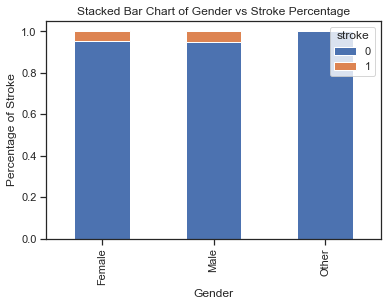

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

print("Percentage of Stroke Occurence Based on Gender:")
print(df.groupby('gender')['stroke'].mean() * 100)
print()
table = pd.crosstab(df.gender, df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs Stroke Percentage')
plt.xlabel('Gender')
plt.ylabel('Percentage of Stroke')
plt.savefig('gender_vs_stroke')

Percentage of Stroke Occurence Based on Marital Status:
ever_married
No     1.650541
Yes    6.561288
Name: stroke, dtype: float64



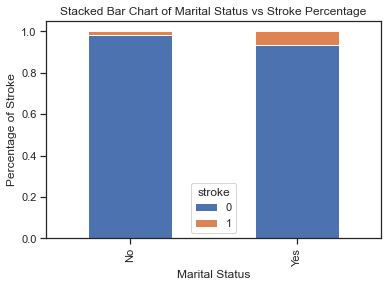

In [11]:
print("Percentage of Stroke Occurence Based on Marital Status:")
print(df.groupby('ever_married')['stroke'].mean() * 100)
print()
table = pd.crosstab(df.ever_married, df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Stroke Percentage')
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Stroke')
plt.savefig('marriage_vs_stroke')

Percentage of Stroke Occurence Based on Work Type:
work_type
Govt_job         5.022831
Never_worked     0.000000
Private          5.094017
Self-employed    7.936508
children         0.291121
Name: stroke, dtype: float64



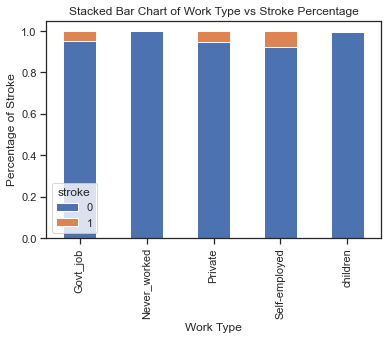

In [12]:
print("Percentage of Stroke Occurence Based on Work Type:")
print(df.groupby('work_type')['stroke'].mean() * 100)
print()
table = pd.crosstab(df.work_type, df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Work Type vs Stroke Percentage')
plt.xlabel('Work Type')
plt.ylabel('Percentage of Stroke')
plt.savefig('work_vs_stroke')

Percentage of Stroke Occurence Based on Residence Type:
Residence_type
Rural    4.534606
Urban    5.200308
Name: stroke, dtype: float64



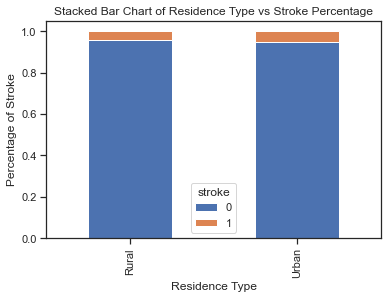

In [13]:
print("Percentage of Stroke Occurence Based on Residence Type:")
print(df.groupby('Residence_type')['stroke'].mean() * 100)
print()
table = pd.crosstab(df.Residence_type, df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Residence Type vs Stroke Percentage')
plt.xlabel('Residence Type')
plt.ylabel('Percentage of Stroke')
plt.savefig('residence_vs_stroke')

Percentage of Stroke Occurence Based on Smoking Status:
smoking_status
Unknown            3.044041
formerly smoked    7.909605
never smoked       4.756871
smokes             5.323194
Name: stroke, dtype: float64



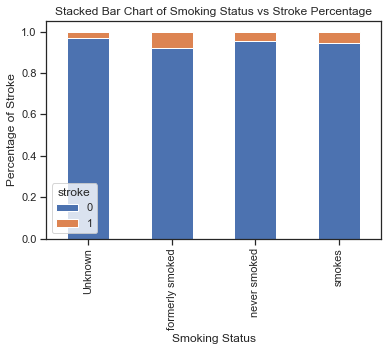

In [14]:
print("Percentage of Stroke Occurence Based on Smoking Status:")
print(df.groupby('smoking_status')['stroke'].mean() * 100)
print()
table = pd.crosstab(df.smoking_status, df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Smoking Status vs Stroke Percentage')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage of Stroke')
plt.savefig('smoking_vs_stroke')

In [15]:
"""As seen from the above charts, the parameters that influence on whether a person will have a stroke are: marital status, work type and smoking status"""

'As seen from the above charts, the parameters that influence on whether a person will have a stroke are: marital status, work type and smoking status'

In [16]:
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2}).astype('int8')
df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1}).astype('int8')
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1}).astype('int8')

In [17]:
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,0,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,1,202.21,28.9,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,0,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,1,174.12,24.0,1,0,0,0,1,0,0,0,1,0


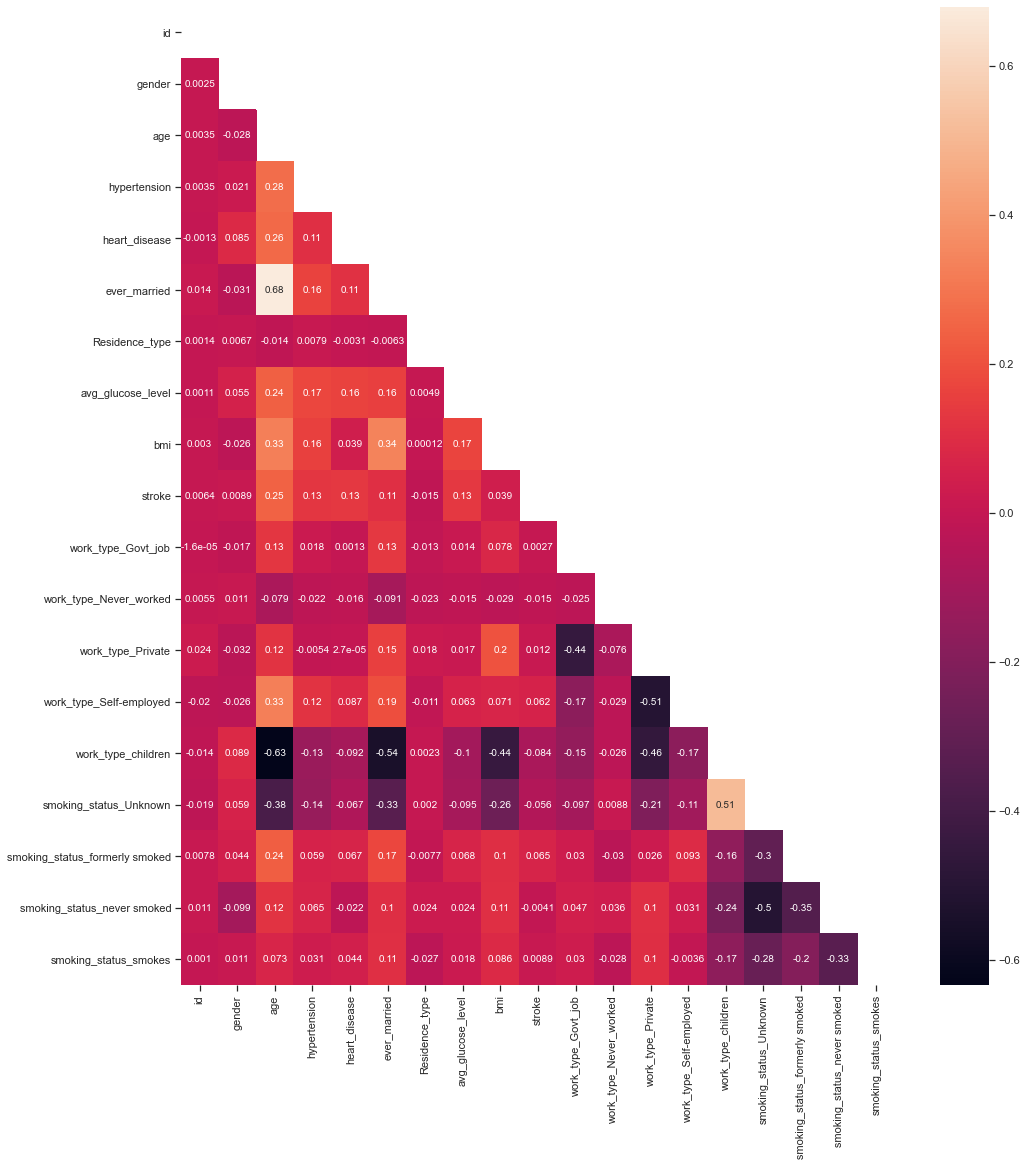

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
fig, ax = plt.subplots(figsize = (16, 18))
sns.heatmap(data = corr, 
            mask = np.triu(np.ones_like(corr, dtype = bool)), 
            ax = ax, 
            annot = True);

In [19]:
y = df['stroke']
X = df.drop(columns=['id', 'stroke'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

0    3645
1     187
Name: stroke, dtype: int64 

 0    1216
1      62
Name: stroke, dtype: int64


In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train_resampled.value_counts())

1    3645
0    3645
Name: stroke, dtype: int64


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

baseline_model = LogisticRegression(random_state=42)
baseline_neg_log_loss_cv = -cross_val_score(
    baseline_model,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
baseline_neg_log_loss_cv.mean()

0.19556466052558424

In [23]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [24]:
baseline_model.fit(X_train_resampled, y_train_resampled)
preds = baseline_model.predict(X_test)
print("Logistic Regression Baseline Model:")
print_metrics(y_test, preds)

Logistic Regression Baseline Model:
Accuracy Score: 0.9107981220657277
Precision Score: 0.21739130434782608
Recall Score: 0.3225806451612903
F1 Score: 0.2597402597402597


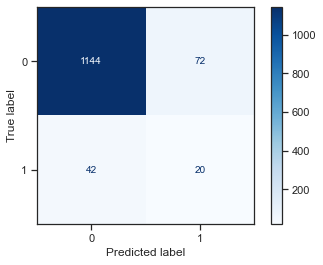

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model, X_test, y_test, cmap = plt.cm.Blues);

In [32]:
from sklearn.model_selection import GridSearchCV
logreg_tuned_model = LogisticRegression(random_state=42)
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet'],
              'solver' : ['liblinear', 'saga']}
    
grid_search = GridSearchCV(estimator = logreg_tuned_model,
                           param_grid = param_grid,
                           cv = 3)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']})

In [33]:
grid_search.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [34]:
logreg_tuned_model = LogisticRegression(random_state=42,
                                       penalty='l1',
                                       solver='liblinear')
logreg_tuned_neg_log_loss_cv = -cross_val_score(
    logreg_tuned_model,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
logreg_tuned_neg_log_loss_cv.mean()

0.18562029835430732

In [35]:
logreg_tuned_model.fit(X_train_resampled, y_train_resampled)
preds = logreg_tuned_model.predict(X_test)
print("Logistic Regression Tuned Model:")
print_metrics(y_test, preds)

Logistic Regression Tuned Model:
Accuracy Score: 0.9225352112676056
Precision Score: 0.23943661971830985
Recall Score: 0.27419354838709675
F1 Score: 0.2556390977443609


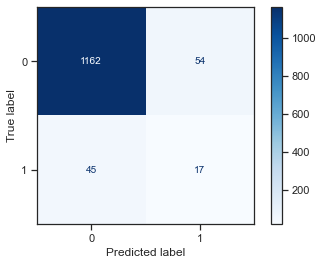

In [36]:
plot_confusion_matrix(logreg_tuned_model, X_test, y_test, cmap = plt.cm.Blues);

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt_baseline_model = DecisionTreeClassifier(random_state=42)
dt_baseline_model_neg_log_loss_cv = -cross_val_score(
    dt_baseline_model,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
dt_baseline_model_neg_log_loss_cv.mean()

1.9946537121004642

In [38]:
dt_baseline_model.fit(X_train_resampled, y_train_resampled)
preds = dt_baseline_model.predict(X_test)
print("Decision Tree Baseline Model:")
print_metrics(y_test, preds)

Decision Tree Baseline Model:
Accuracy Score: 0.8998435054773083
Precision Score: 0.14893617021276595
Recall Score: 0.22580645161290322
F1 Score: 0.17948717948717946


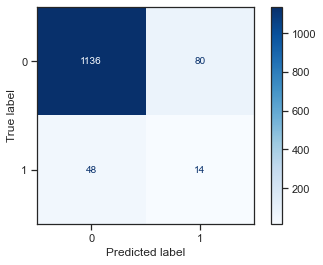

In [39]:
plot_confusion_matrix(dt_baseline_model, X_test, y_test, cmap = plt.cm.Blues);

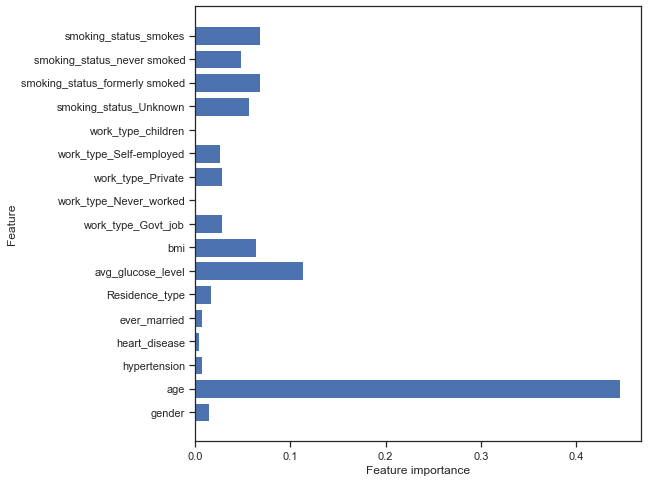

In [40]:
def plot_feature_importances(model):
    n_features = X_train_resampled.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_resampled.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel('Feature')
    
plot_feature_importances(dt_baseline_model)

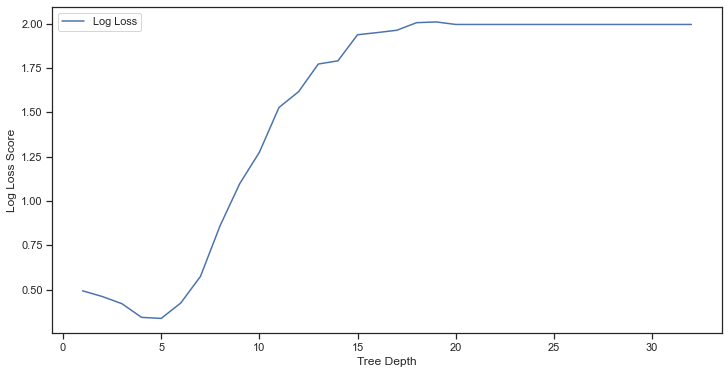

In [41]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
log_loss_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train_resampled, y_train_resampled)
    y_pred = dt.predict(X_test)
    dt_log_loss = cross_val_score(
        dt, 
        X_train_resampled,
        y_train_resampled,
        scoring='neg_log_loss')
    dtlog_loss = -(dt_log_loss.mean())
    log_loss_results.append(dtlog_loss)
    
plt.figure(figsize=(12,6))
plt.plot(max_depths, log_loss_results, label='Log Loss')
plt.ylabel('Log Loss Score')
plt.xlabel("Tree Depth")
plt.legend()
plt.show()

In [40]:
"""max depths of 5 is the best parameter"""

'max depths of 5 is the best parameter'

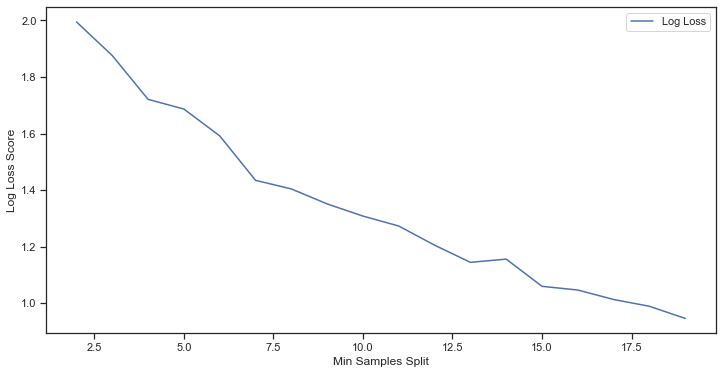

In [42]:
min_samples_splits = np.arange(2, 20)
log_loss_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(
        min_samples_split=int(min_samples_split),
        random_state=42)
    dt.fit(X_train_resampled, y_train_resampled)
    y_pred = dt.predict(X_test)
    dt_log_loss = cross_val_score(
        dt, 
        X_train_resampled,
        y_train_resampled,
        scoring='neg_log_loss')
    dtlog_loss = -(dt_log_loss.mean())
    log_loss_results.append(dtlog_loss)
    
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, log_loss_results, label='Log Loss')
plt.ylabel('Log Loss Score')
plt.xlabel("Min Samples Split")
plt.legend()
plt.show()

In [43]:
"""min samples split of 18 is the best parameter"""

'min samples split of 18 is the best parameter'

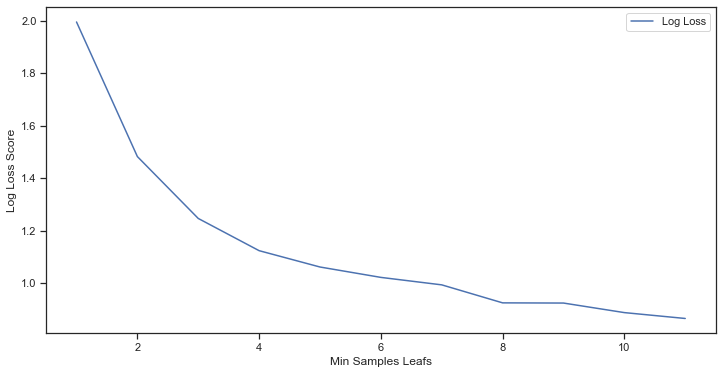

In [44]:
min_samples_leafs = np.arange(1, 12)
log_loss_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(
        min_samples_leaf=int(min_samples_leaf),
        random_state=42)
    dt.fit(X_train_resampled, y_train_resampled)
    y_pred = dt.predict(X_test)
    dt_log_loss = cross_val_score(
        dt, 
        X_train_resampled,
        y_train_resampled,
        scoring='neg_log_loss')
    dtlog_loss = -(dt_log_loss.mean())
    log_loss_results.append(dtlog_loss)
    
plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, log_loss_results, label='Log Loss')
plt.ylabel('Log Loss Score')
plt.xlabel("Min Samples Leafs")
plt.legend()
plt.show()

In [44]:
"""10 is the best parameter for min_samples_leafs"""

'10 is the best parameter for min_samples_leafs'

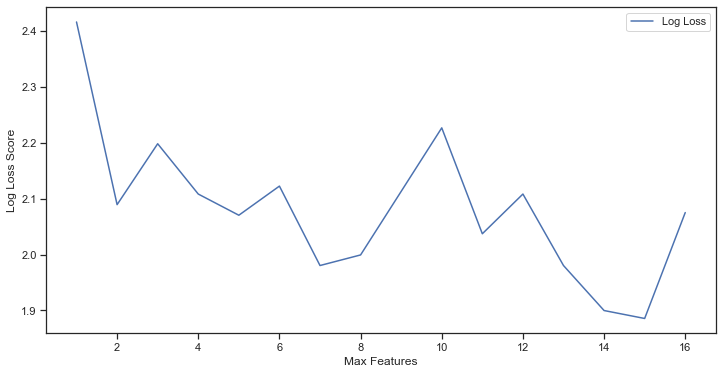

In [45]:
max_features = list(range(1, X_train_resampled.shape[1]))
log_loss_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(
        max_features=max_feature,
        random_state=42)
    dt.fit(X_train_resampled, y_train_resampled)
    y_pred = dt.predict(X_test)
    dt_log_loss = cross_val_score(
        dt, 
        X_train_resampled,
        y_train_resampled,
        scoring='neg_log_loss')
    dtlog_loss = -(dt_log_loss.mean())
    log_loss_results.append(dtlog_loss)
    
plt.figure(figsize=(12,6))
plt.plot(max_features, log_loss_results, label='Log Loss')
plt.ylabel('Log Loss Score')
plt.xlabel("Max Features")
plt.legend()
plt.show()

In [46]:
"""15 is the best parameter for max features"""

'15 is the best parameter for max features'

In [50]:
dt_tuned_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=18,
    min_samples_leaf=10,
    max_features=15)
dt_tuned_neg_log_loss_cv = -cross_val_score(
    dt_tuned_model,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
dt_tuned_neg_log_loss_cv.mean()

0.31253778593142745

In [51]:
dt_tuned_model.fit(X_train_resampled, y_train_resampled)
preds = dt_tuned_model.predict(X_test)
print("Decision Tree Tuned Model:")
print_metrics(y_test, preds)

Decision Tree Tuned Model:
Accuracy Score: 0.8693270735524257
Precision Score: 0.16981132075471697
Recall Score: 0.43548387096774194
F1 Score: 0.24434389140271492


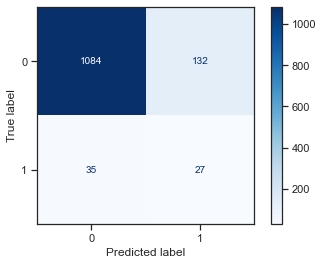

In [52]:
plot_confusion_matrix(dt_tuned_model, X_test, y_test, cmap = plt.cm.Blues);

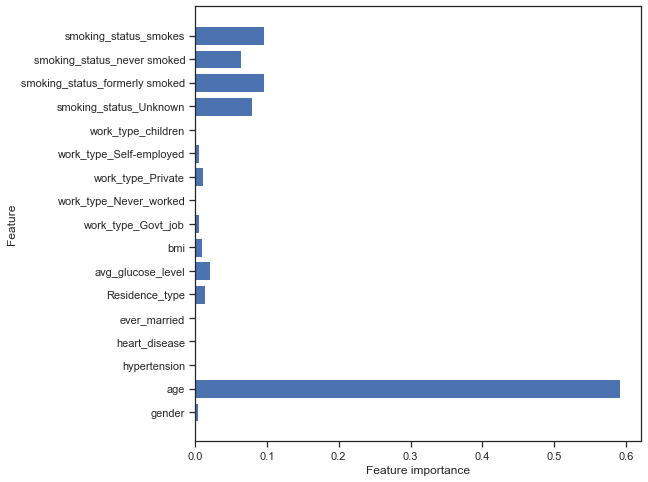

In [53]:
plot_feature_importances(dt_tuned_model)

In [54]:
from sklearn.ensemble import BaggingClassifier
bagged_tree_baseline = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100)
bagged_tree_baseline_neg_log_loss_cv = -cross_val_score(
    bagged_tree_baseline,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
bagged_tree_baseline_neg_log_loss_cv.mean()

0.17501083556594557

In [55]:
bagged_tree_baseline.fit(X_train_resampled, y_train_resampled)
preds = bagged_tree_baseline.predict(X_test)
print("Bagged Tree Baseline Model:")
print_metrics(y_test, preds)

Bagged Tree Baseline Model:
Accuracy Score: 0.931924882629108
Precision Score: 0.16216216216216217
Recall Score: 0.0967741935483871
F1 Score: 0.12121212121212119


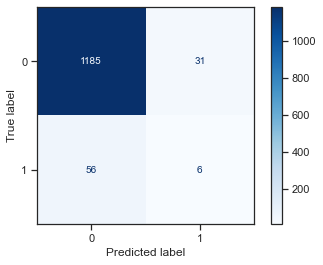

In [56]:
plot_confusion_matrix(bagged_tree_baseline, X_test, y_test, cmap = plt.cm.Blues);

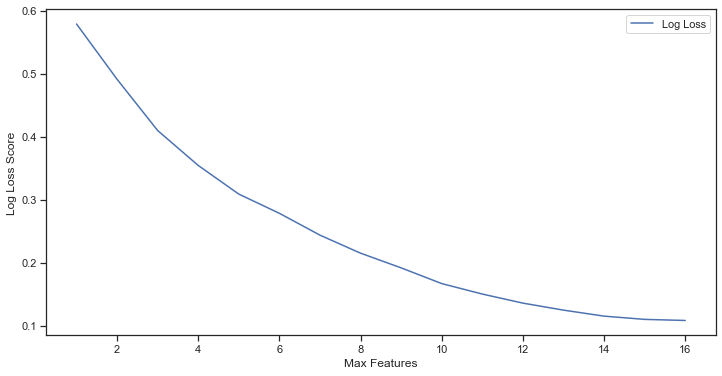

In [57]:
max_features = list(range(1, X_train_resampled.shape[1]))
log_loss_results = []
for max_feature in max_features:
    bagged_best = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                                    n_estimators=100,
                                    max_features=max_feature)
    bagged_best.fit(X_train_resampled, y_train_resampled)
    y_pred = dt.predict(X_test)
    bagged_log_loss = cross_val_score(
        bagged_best, 
        X_train_resampled,
        y_train_resampled,
        scoring='neg_log_loss')
    baggedlog_loss = -(bagged_log_loss.mean())
    log_loss_results.append(baggedlog_loss)
    
plt.figure(figsize=(12,6))
plt.plot(max_features, log_loss_results, label='Log Loss')
plt.ylabel('Log Loss Score')
plt.xlabel("Max Features")
plt.legend()
plt.show()

In [58]:
bagged_tree_tuned = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=75, max_features=14)
bagged_tree_tuned_neg_log_loss_cv = -cross_val_score(
    bagged_tree_tuned,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
bagged_tree_tuned_neg_log_loss_cv.mean()

0.11490995273348956

In [59]:
bagged_tree_tuned.fit(X_train_resampled, y_train_resampled)
preds = bagged_tree_tuned.predict(X_test)
print("Bagged Tree Tuned Model:")
print_metrics(y_test, preds)

Bagged Tree Tuned Model:
Accuracy Score: 0.935054773082942
Precision Score: 0.16129032258064516
Recall Score: 0.08064516129032258
F1 Score: 0.1075268817204301


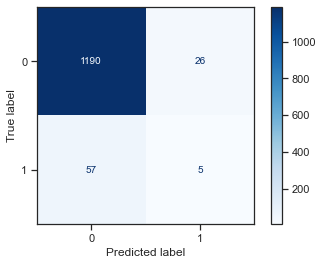

In [60]:
plot_confusion_matrix(bagged_tree_tuned, X_test, y_test, cmap = plt.cm.Blues);

In [61]:
from sklearn.ensemble import RandomForestClassifier
forest_baseline = RandomForestClassifier(random_state=42)
forest_baseline_neg_log_loss_cv = -cross_val_score(
    forest_baseline,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
forest_baseline_neg_log_loss_cv.mean()

0.10323777223591397

In [62]:
forest_baseline.fit(X_train_resampled, y_train_resampled)
preds = forest_baseline.predict(X_test)
print("Random Forest Baseline Model:")
print_metrics(y_test, preds)

Random Forest Baseline Model:
Accuracy Score: 0.9374021909233177
Precision Score: 0.15384615384615385
Recall Score: 0.06451612903225806
F1 Score: 0.09090909090909091


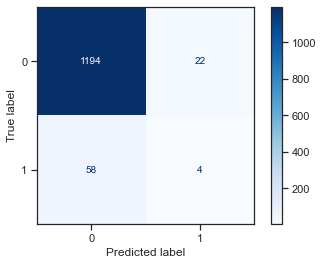

In [63]:
plot_confusion_matrix(forest_baseline, X_test, y_test, cmap = plt.cm.Blues);

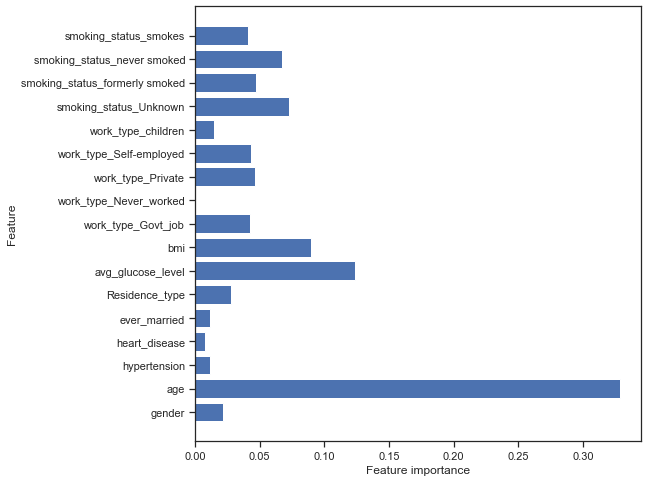

In [64]:
plot_feature_importances(forest_baseline)

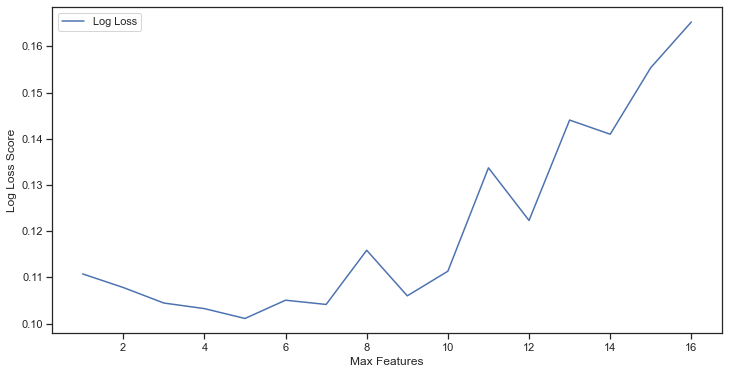

In [69]:
max_features = list(range(1, X_train_resampled.shape[1]))
log_loss_results = []
for max_feature in max_features:
    forest = RandomForestClassifier(random_state=42,
                                    max_features=max_feature)
    forest.fit(X_train_resampled, y_train_resampled)
    y_pred = forest.predict(X_test)
    forest_log_loss = cross_val_score(
        forest, 
        X_train_resampled,
        y_train_resampled,
        scoring='neg_log_loss')
    forestlog_loss = -(forest_log_loss.mean())
    log_loss_results.append(forestlog_loss)
    
plt.figure(figsize=(12,6))
plt.plot(max_features, log_loss_results, label='Log Loss')
plt.ylabel('Log Loss Score')
plt.xlabel("Max Features")
plt.legend()
plt.show()

In [71]:
random_forest_tuned = RandomForestClassifier(random_state=42, max_features=5)
random_forest_tuned_neg_log_loss_cv = -cross_val_score(
    random_forest_tuned,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
random_forest_tuned_neg_log_loss_cv.mean()

0.10110178224831654

In [72]:
random_forest_tuned.fit(X_train_resampled, y_train_resampled)
preds = random_forest_tuned.predict(X_test)
print("Random Forest Tuned Model:")
print_metrics(y_test, preds)

Random Forest Tuned Model:
Accuracy Score: 0.9366197183098591
Precision Score: 0.12
Recall Score: 0.04838709677419355
F1 Score: 0.0689655172413793


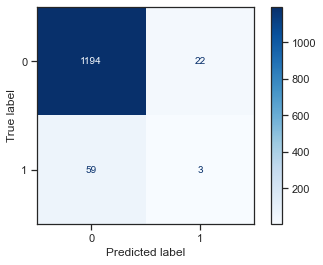

In [73]:
plot_confusion_matrix(random_forest_tuned, X_test, y_test, cmap = plt.cm.Blues);

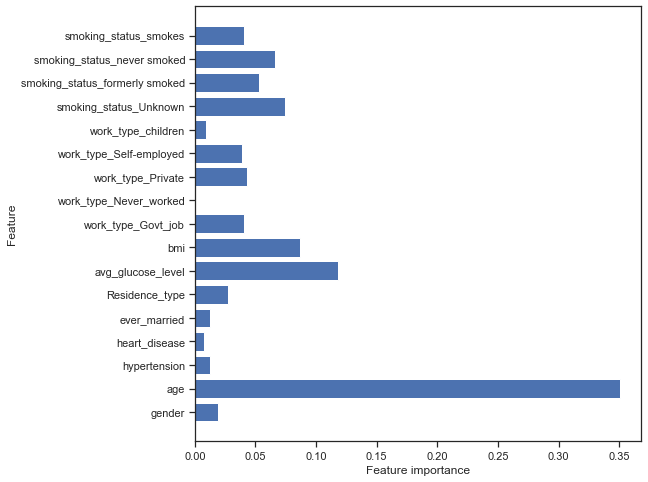

In [74]:
plot_feature_importances(random_forest_tuned)

In [75]:
from xgboost import XGBClassifier
xgb_baseline = XGBClassifier(random_state=42)
xgb_baseline_neg_log_loss_cv = -cross_val_score(
    xgb_baseline,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
xgb_baseline_neg_log_loss_cv.mean()

0.12882805051966478

In [76]:
xgb_baseline.fit(X_train_resampled, y_train_resampled)
preds = xgb_baseline.predict(X_test)
print("XGBoost Baseline Model:")
print_metrics(y_test, preds)

XGBoost Baseline Model:
Accuracy Score: 0.9327073552425665
Precision Score: 0.21428571428571427
Recall Score: 0.14516129032258066
F1 Score: 0.17307692307692307


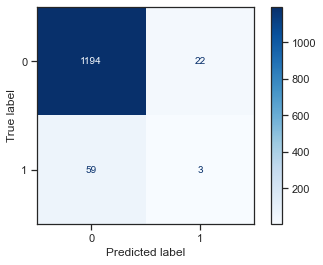

In [77]:
plot_confusion_matrix(random_forest_tuned, X_test, y_test, cmap = plt.cm.Blues);

In [78]:
xgb_tuned = XGBClassifier(random_state=42)
param_grid = {'learning_rate' : [0.1, 0.2],
              'max_depth' : [6],
              'min_child_weight' : [1, 2],
              'subsample' : [0.5, 0.7],
              'n_estimators' : [100]}
    
grid_search = GridSearchCV(estimator = xgb_tuned,
                           param_grid = param_grid,
                           cv = 3)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [79]:
grid_search.best_params_

{'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.7}

In [80]:
xgb_tuned = XGBClassifier(random_state=42,
                          learning_rate=0.2,
                          max_depth=6,
                          min_child_weight=1,
                          n_estimators=100,
                          subsample=0.7)
xgb_tuned_neg_log_loss_cv = -cross_val_score(
    xgb_tuned,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
xgb_tuned_neg_log_loss_cv.mean()

0.11550646616010973

In [81]:
xgb_tuned.fit(X_train_resampled, y_train_resampled)
preds = xgb_tuned.predict(X_test)
print("XGBoost Tuned Model:")
print_metrics(y_test, preds)

XGBoost Tuned Model:
Accuracy Score: 0.931924882629108
Precision Score: 0.14285714285714285
Recall Score: 0.08064516129032258
F1 Score: 0.10309278350515463


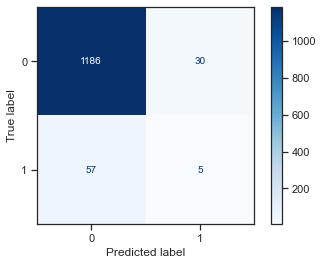

In [82]:
plot_confusion_matrix(xgb_tuned, X_test, y_test, cmap = plt.cm.Blues);

In [84]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_baseline = GaussianNB()
naive_bayes_baseline_neg_log_loss_cv = -cross_val_score(
    naive_bayes_baseline,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
naive_bayes_baseline_neg_log_loss_cv.mean()

1.4725686681760626

In [85]:
naive_bayes_baseline.fit(X_train_resampled, y_train_resampled)
preds = naive_bayes_baseline.predict(X_test)
print("Naive Bayes Baseline Model:")
print_metrics(y_test, preds)

Naive Bayes Baseline Model:
Accuracy Score: 0.5774647887323944
Precision Score: 0.07773851590106007
Recall Score: 0.7096774193548387
F1 Score: 0.14012738853503184


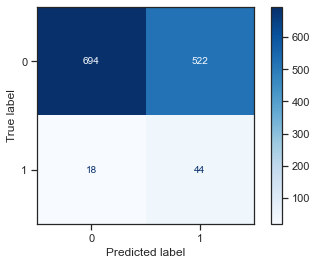

In [86]:
plot_confusion_matrix(naive_bayes_baseline, X_test, y_test, cmap = plt.cm.Blues);

In [101]:
nb_tuned = GaussianNB()
param_grid = {'var_smoothing' : np.logspace(0,-9, num=100)}
    
grid_search = GridSearchCV(estimator = nb_tuned,
                           param_grid = param_grid,
                           cv = 3)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [103]:
grid_search.best_params_

{'var_smoothing': 1.2328467394420658e-05}

In [104]:
nb_tuned = GaussianNB(var_smoothing=1.23e-05)
nb_tuned_neg_log_loss_cv = -cross_val_score(
    nb_tuned,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
nb_tuned_neg_log_loss_cv.mean()

0.42976248556944724

In [105]:
nb_tuned.fit(X_train_resampled, y_train_resampled)
preds = nb_tuned.predict(X_test)
print("Naive Bayes Tuned Model:")
print_metrics(y_test, preds)

Naive Bayes Tuned Model:
Accuracy Score: 0.730829420970266
Precision Score: 0.11263736263736264
Recall Score: 0.6612903225806451
F1 Score: 0.19248826291079812


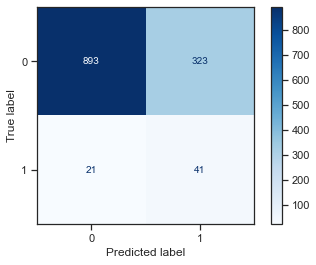

In [106]:
plot_confusion_matrix(nb_tuned, X_test, y_test, cmap = plt.cm.Blues);

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn_baseline = KNeighborsClassifier()
knn_baseline_log_loss = -cross_val_score(
    knn_baseline,
    X_train_scaled,
    y_train_resampled,
    scoring='neg_log_loss').mean()
knn_baseline_log_loss

0.7176327674946251

In [109]:
knn_baseline.fit(X_train_scaled, y_train_resampled)
preds = knn_baseline.predict(X_test_scaled)
print("KNN Baseline Model:")
print_metrics(y_test, preds)

KNN Baseline Model:
Accuracy Score: 0.8982785602503912
Precision Score: 0.0641025641025641
Recall Score: 0.08064516129032258
F1 Score: 0.07142857142857142


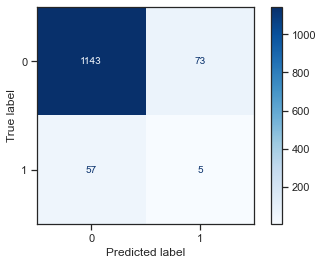

In [110]:
plot_confusion_matrix(knn_baseline, X_test_scaled, y_test, cmap = plt.cm.Blues);

In [133]:
knn_first_model = KNeighborsClassifier(n_neighbors=90)
knn_first_log_loss = -cross_val_score(
    knn_first_model,
    X_train_scaled,
    y_train_resampled,
    scoring='neg_log_loss').mean()
knn_first_log_loss

0.24105856902065442

In [129]:
knn_second_model = KNeighborsClassifier(n_neighbors=50)
knn_second_log_loss = -cross_val_score(
    knn_second_model,
    X_train_scaled,
    y_train_resampled,
    scoring='neg_log_loss').mean()
knn_second_log_loss

0.2478696907689137

In [134]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=50, max_k=90):
    best_k = 0
    best_score = 1.00
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        log_loss = -cross_val_score(
            knn,
            X_train,
            y_train, 
            scoring='neg_log_loss').mean()
        if log_loss < best_score:
            best_k = k
            best_score = log_loss
    print("Best Value for k: {}".format(best_k))
    print("Log Loss: {}".format(best_score))

In [135]:
find_best_k(X_train_scaled, y_train_resampled, X_test_scaled, y_test)

Best Value for k: 76
Log Loss: 0.23473466881956623


In [136]:
knn_tuned_model = KNeighborsClassifier(n_neighbors=76)
knn_tuned_log_loss = -cross_val_score(
    knn_tuned_model,
    X_train_scaled,
    y_train_resampled,
    scoring='neg_log_loss').mean()
knn_tuned_log_loss

0.23473466881956623

In [137]:
knn_tuned_model.fit(X_train_scaled, y_train_resampled)
preds = knn_tuned_model.predict(X_test_scaled)
print("KNN Tuned Model:")
print_metrics(y_test, preds)

KNN Tuned Model:
Accuracy Score: 0.918622848200313
Precision Score: 0.21621621621621623
Recall Score: 0.25806451612903225
F1 Score: 0.23529411764705882


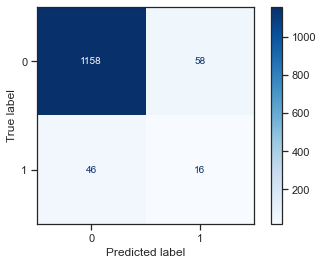

In [139]:
plot_confusion_matrix(knn_tuned_model, X_test_scaled, y_test, cmap = plt.cm.Blues);